# EDA

> fuente: Airbnb New York

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importamos los datos

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Obtenemos las dimensiones
df.shape

(48895, 16)

In [4]:
# Obtenemos informacion sobre el tipo de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Obtenemos informacion estadistica las columnas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


> ## Observaciones:
>
> - Existen un total de 48895 filas(en este caso, viviendas) y 16 columnas, entre las cuales está el target o clase a predecir, price
> - Las variables las_review y reviews_per_month tienen unos 10000 valores nulos (20,8%)
> - Las variables name y host_nane tienen unos 20 valores nulos
> - El resto de variables cuentan siempre con valor
> - Los datos constan de 10 variables numéricas y 6 variables categoricas

In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [7]:
# Comprobamos si hay valores duplicados, en este caso no
df.duplicated().sum()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


> ### LIMPIEZA DE DATOS
>
> Las variables que vamos a eliminar porque las consideramos irrelevantes en el proceso predictivo son:
>
> id, name, host_id, host_name, last_review, reviews_per_month, neighbourhood

In [3]:
df.drop(["id", "name", "host_id", "host_name", "neighbourhood", "last_review", "reviews_per_month"], axis=1, inplace=True)
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,6,2


In [9]:
df.head()


,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


### ANALISIS DE VARIABLES UNIVARIANTES CATEGORICAS: 
    neighbourhood_group, room_type, availability_365

In [10]:
df_filter_minimum_nights=df[df['minimum_nights'] < 40] # Exluimos 505 viviendas con disponibilidad mayor a 100 dias
#df_filter_minimum_nights
df[df['minimum_nights'] > 30]

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
6,Brooklyn,40.68688,-73.95596,Private room,60,45,49,1,0
14,Manhattan,40.73530,-74.00525,Entire home/apt,120,90,27,1,0
36,Brooklyn,40.68876,-73.94312,Private room,35,60,0,1,365
61,Manhattan,40.74623,-73.99530,Entire home/apt,375,180,5,1,180
81,Manhattan,40.82915,-73.95136,Entire home/apt,110,31,54,1,209
...,...,...,...,...,...,...,...,...,...
48325,Brooklyn,40.68719,-73.99515,Private room,70,60,0,1,156
48368,Manhattan,40.81458,-73.93696,Private room,150,60,0,1,215
48446,Staten Island,40.64005,-74.07987,Entire home/apt,100,365,0,1,342
48752,Brooklyn,40.67905,-73.95014,Private room,45,32,0,1,85


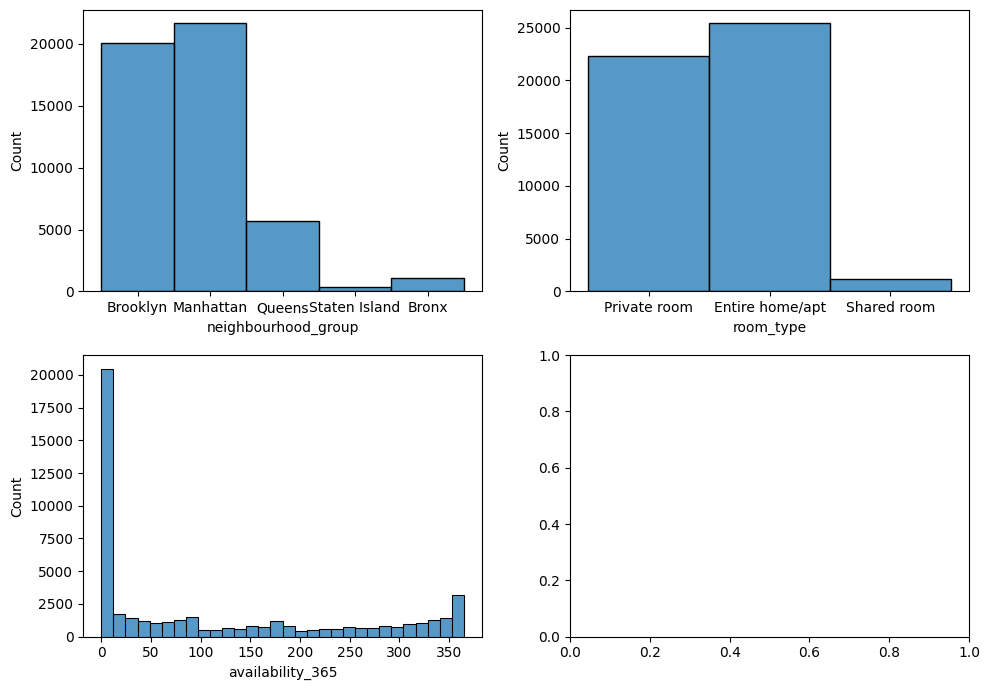

In [7]:
fig, axis = plt.subplots(2, 2, figsize=(10, 7))


sns.histplot(ax=axis[0,0], data=df, x='neighbourhood_group')
sns.histplot(ax=axis[0,1], data=df, x='room_type')
sns.histplot(ax=axis[1,0], data=df, x='availability_365')


plt.tight_layout()
#df[df['availability_365'] == 0]


> ## Observaciones
> 
> - neighbourhood_group: La mayoria de pisos en alquiler se encuentran repartidos entre Brooklyn y Manhattan (unas 20000 viviendas cada uno), les sigue Queens con unas 5000
> - room_type: La mayoria de pisos en alquiler son de tipo habitacion privada y casas enteras/apartamentos. Hay un numero muy bajo pisos compartidos 
> - availability_365: Nos encontramos que unas 20000 viviendas no estan disponibles ningun dia. El resto tiene valores similares


### ANALISIS DE VARIABLES UNIVARIANTES NUMERICAS:
    latitude, longitude, price, minimum_nights, number_of_reviews, calculated_host_listing


In [12]:
#df[df['price'] > 1500]   139 viviendas
#df[df['minimum_nights'] > 100] 174 viviendas

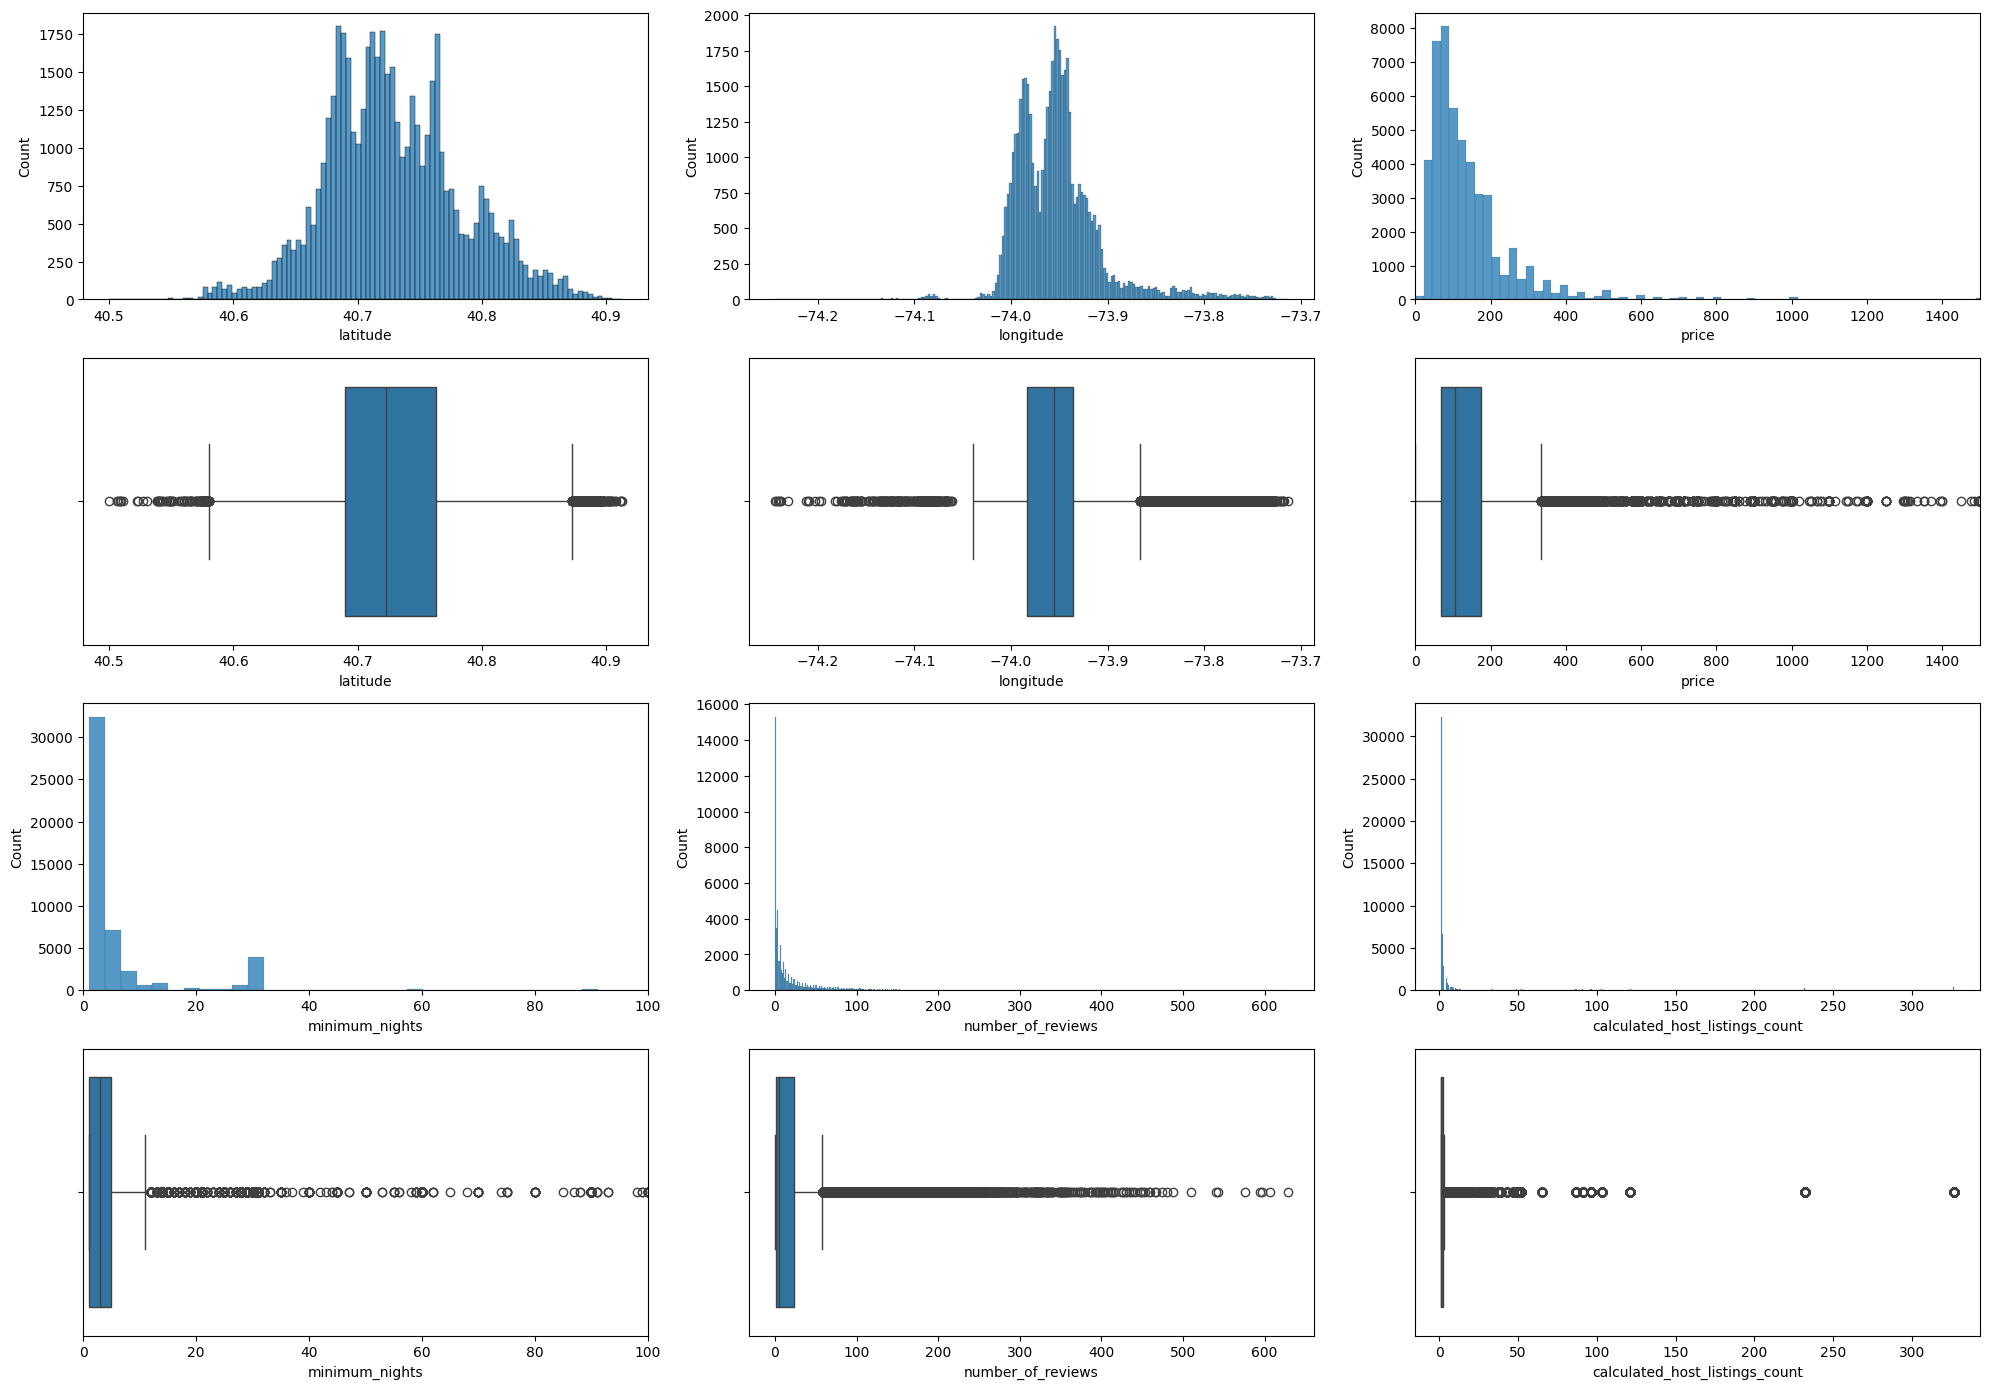

In [13]:
fig, axis = plt.subplots(4, 3, figsize=(20, 14))

sns.histplot(ax=axis[0,0], data=df, x='latitude')
sns.boxplot(ax=axis[1,0], data=df, x='latitude')
sns.histplot(ax=axis[0,1], data=df, x='longitude')
sns.boxplot(ax=axis[1,1], data=df, x='longitude')
sns.histplot(ax=axis[0,2], data=df, x='price').set_xlim(0,1500)
sns.boxplot(ax=axis[1,2], data=df, x='price').set_xlim(0,1500)
sns.histplot(ax=axis[2,0], data=df, x='minimum_nights').set_xlim(0,100)
sns.boxplot(ax=axis[3,0], data=df, x='minimum_nights').set_xlim(0,100)
sns.histplot(ax=axis[2,1], data=df, x='number_of_reviews')
sns.boxplot(ax=axis[3,1], data=df, x='number_of_reviews')
sns.histplot(ax=axis[2,2], data=df, x='calculated_host_listings_count')
sns.boxplot(ax=axis[3,2], data=df, x='calculated_host_listings_count')

plt.tight_layout()

> ## Observaciones
> - latitud, longitud : tienen distribuciones ligeramente simetricas, donde la media y la moda son parecidas
> - pricen minimum_nights,number_of_reviews,calculated_host: las distribuciones son asimetricas y están totalmente sesgadas a la izquierda, todas tienen valores atípicos



### ANALISIS DE VARIABLES MULTIVARIANTE NUMERICO-NUMERICO
    Price - (latitude, longitude, minimum_nights, number_of_reviews, calculated_host_listing_count)


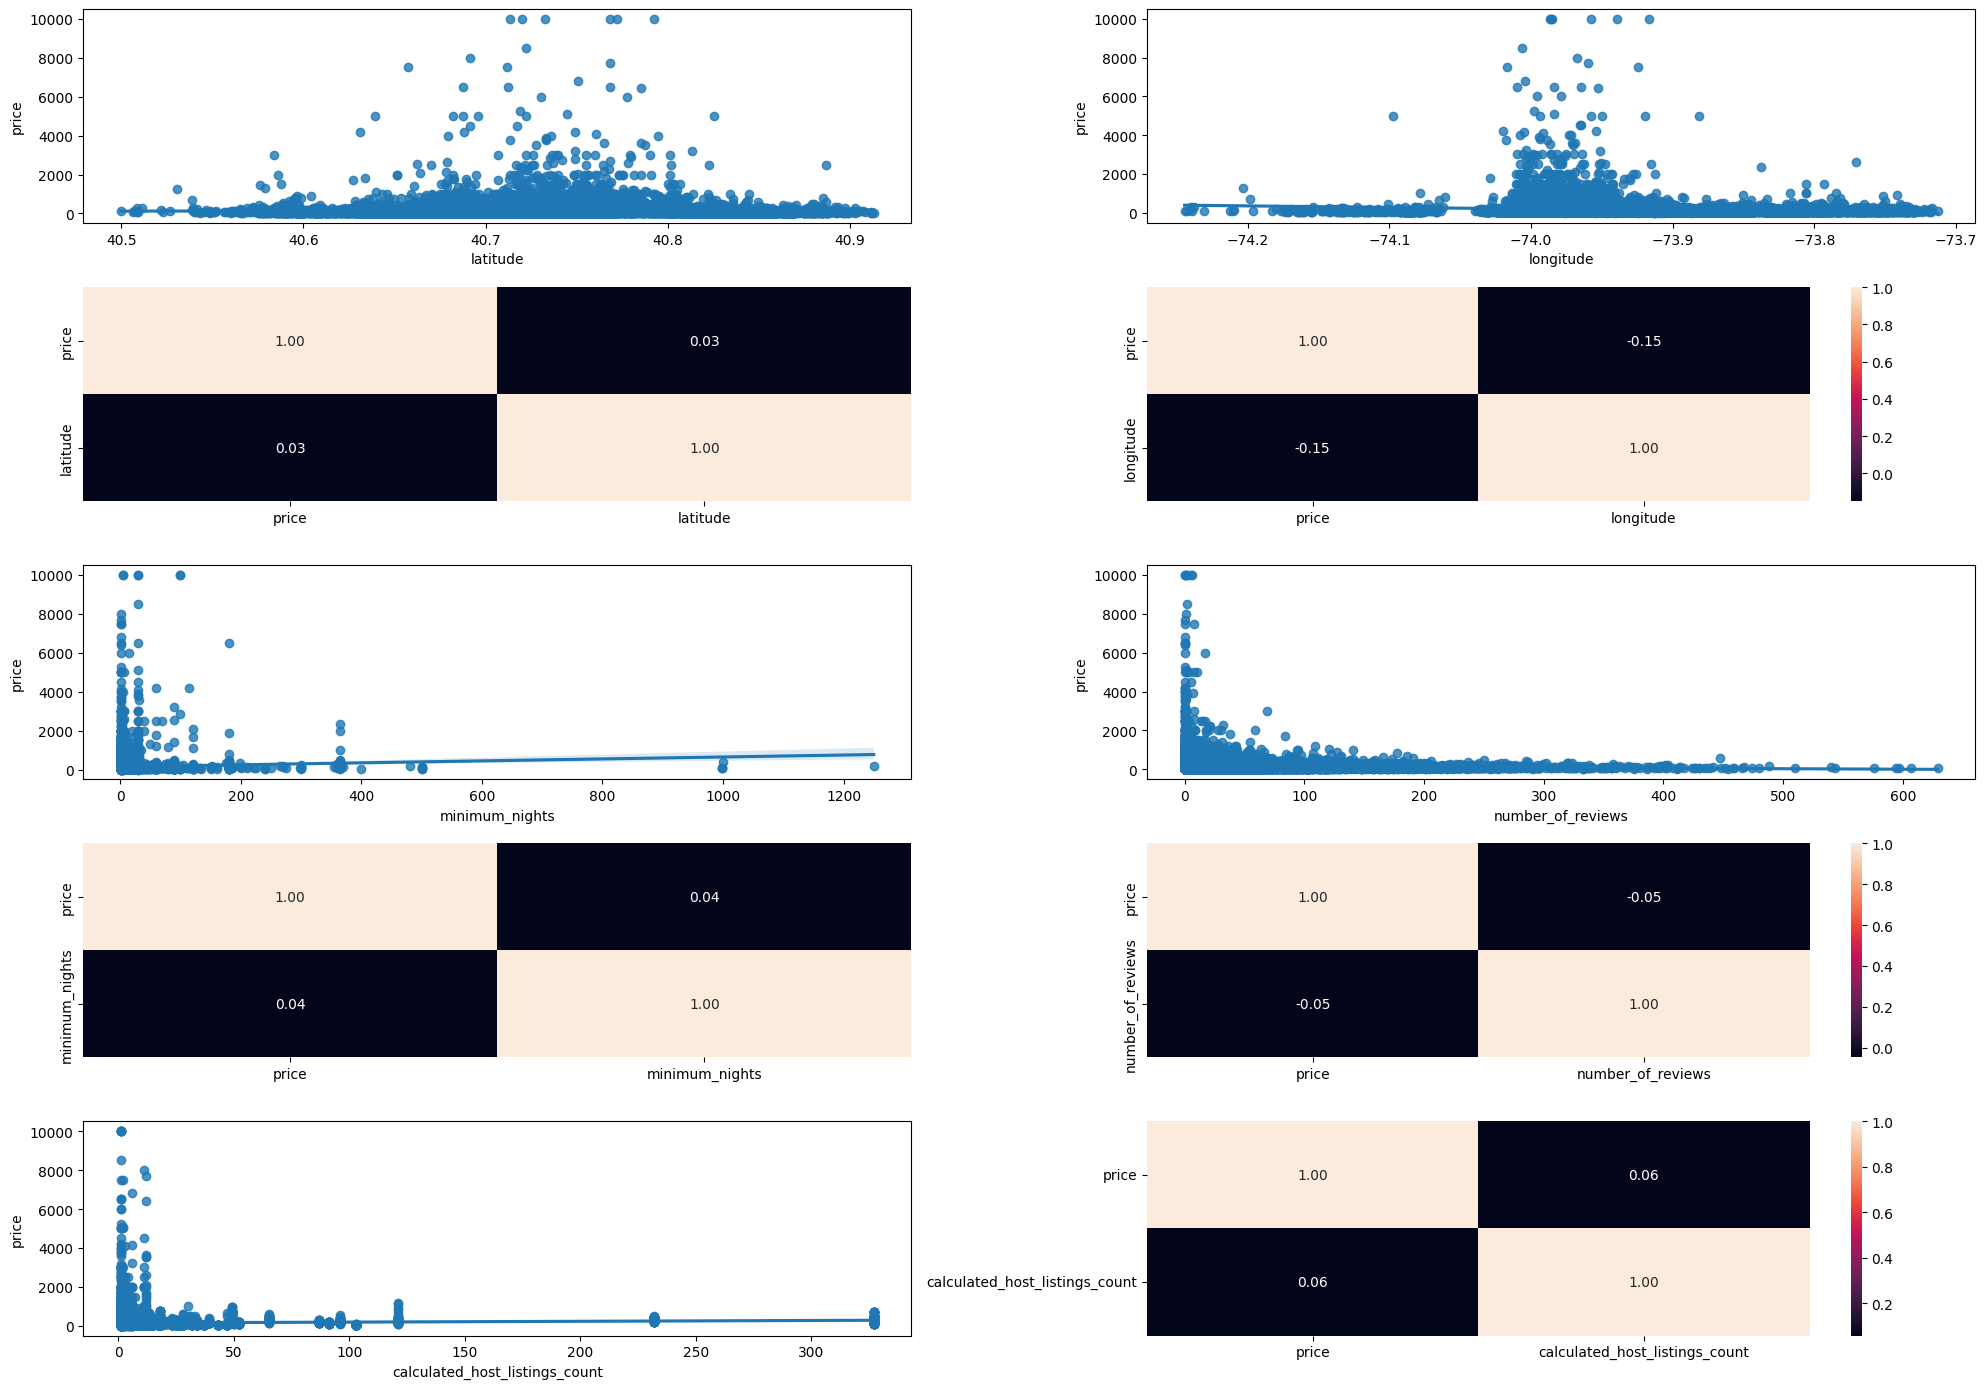

In [14]:
fig, axis = plt.subplots(5, 2, figsize=(20, 14))

sns.regplot(ax=axis[0,0], data=df, x='latitude', y='price')
sns.heatmap(df[['price', 'latitude']].corr(), annot=True, fmt='.2f', ax=axis[1,0], cbar=False)
sns.regplot(ax=axis[0,1], data=df, x='longitude', y='price')
sns.heatmap(df[['price', 'longitude']].corr(), annot=True, fmt='.2f', ax=axis[1,1])
sns.regplot(ax=axis[2,0], data=df, x='minimum_nights', y='price')
sns.heatmap(df[['price', 'minimum_nights']].corr(), annot=True, fmt='.2f', ax=axis[3,0], cbar=False)
sns.regplot(ax=axis[2,1], data=df, x='number_of_reviews', y='price')
sns.heatmap(df[['price', 'number_of_reviews']].corr(), annot=True, fmt='.2f', ax=axis[3,1])
sns.regplot(ax=axis[4,0], data=df, x='calculated_host_listings_count', y='price')
sns.heatmap(df[['price', 'calculated_host_listings_count']].corr(), annot=True, fmt='.2f', ax=axis[4,1])


plt.tight_layout()

> ## Observaciones
> 
> No hay ninguna relación directa entre las variables numéricas y la tarjet 'price'

### ANALISIS DE VARIABLES MULTIVARIANTE CATEGORICO-CATEGORICO
    Price - (neighbourhood_group, room_type, availability_365)

In [32]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,factor_price
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365,0
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365,0
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,0
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,0


In [23]:
# Convertimos la variable numerica price(tarjet) en categorica  para poder hacer la comparacion. 
df['factor_price'] = df['price'].apply(lambda x: 'expensive' if x >  df['price'].mean() else 'cheap')



In [33]:
#df[df['price'] > df['price'].mean()]['room_type'].value_counts()

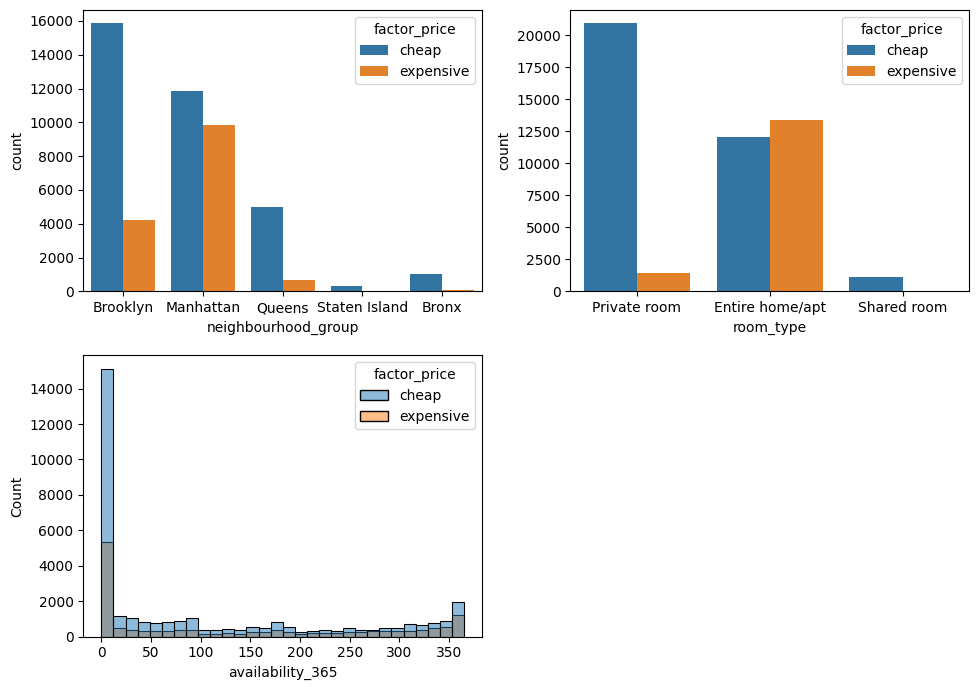

In [ ]:
fig, axis = plt.subplots(2, 2, figsize=(10, 7))
sns.countplot(ax=axis[0,0], data=df, x='neighbourhood_group', hue='factor_price')
sns.countplot(ax=axis[0,1], data=df, x='room_type', hue='factor_price')
sns.histplot(ax=axis[1,0], data=df, x='availability_365', hue='factor_price')

plt.tight_layout()
fig.delaxes(axis[1, 1])

> ## Observaciones
> 
> - La mayoria de las casas clasificadas por grupo vecindario tienes precios baratos, excepto en Manhattan que los precios son similares con una pequeña tendencia a ser mas baratos
> - La mayoria de las casas tipo habitacion privada o compartida tienes precios baratos, excepto en casas completas/apartamentos que los precios son similares
> - 

### COMBINACIONES DE LA CLASE CON VARIAS PREDICTORAS


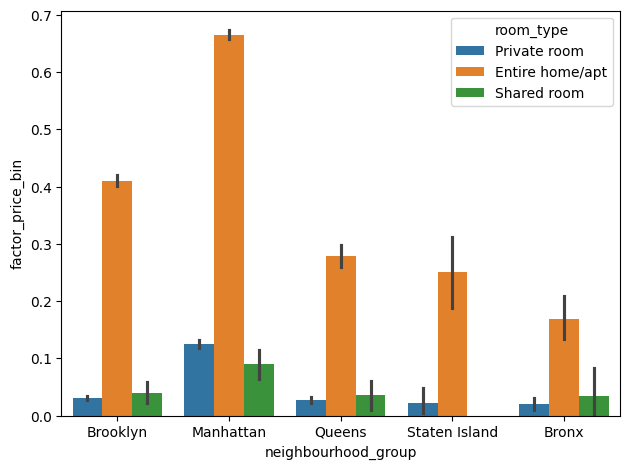

In [42]:
df['factor_price_bin'] = pd.factorize(df['factor_price'])[0]
sns.barplot(data=df, x='neighbourhood_group', y='factor_price_bin', hue='room_type')

plt.tight_layout()


> ## Observaciones
> 
> - 


### ANALISIS DE CORRELACIONES CON DATOS CATEGORICOS-CATEGORICOS


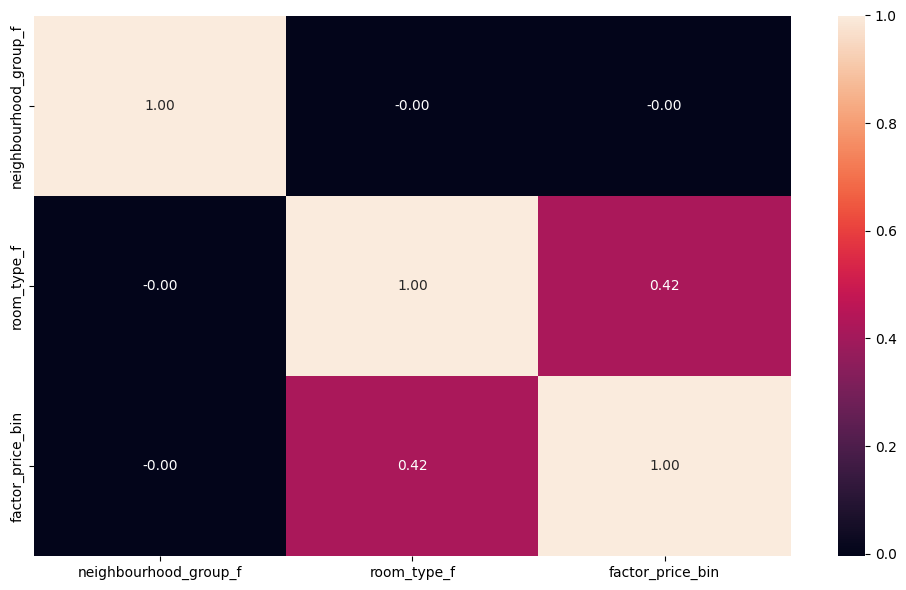

In [52]:
df['neighbourhood_group_f'] = pd.factorize(df['neighbourhood_group'])[0]  #0-Brooklyn, 1-'Manhattan', 2-'Queens', 3-'Staten Island', 4-'Bronx'
df['room_type_f'] = pd.factorize(df['room_type'])[0]  # 0-Private room, 1-'Entire home/apt', 2-'Shared room

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df[['neighbourhood_group_f', 'room_type_f', 'factor_price_bin']].corr(), annot= True, fmt=".2f")

plt.tight_layout()